# MACHINE LEARNING PAPER - II
1. Unsupervised learning
<br>
Submitted by: Pushkar Khedkar

<br>
Given Dataset: "Credit_card" data.
<br>

### ATTRIBUTES INFORMATION

1) CUSTID: Identification of Credit Card holder (Categorical) 

2) BALANCE: Balance amount left in their account to make purchases 

3) BALANCEFREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) 

4) PURCHASES: Amount of purchases made from account 

5) ONEOFFPURCHASES: Maximum purchase amount done in one-go 

6) INSTALLMENTSPURCHASES: Amount of purchase done in installment 

7) CASHADVANCE: Cash in advance given by the user 

8) PURCHASESFREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) 

9) ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) 

10) PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) 

11) CASHADVANCEFREQUENCY: How frequently the cash in advance being paid 

12) CASHADVANCETRX: Number of Transactions made with "Cash in Advanced" 

13) PURCHASESTRX: Number of purchase transactions made 

14) CREDITLIMIT: Limit of Credit Card for user 

15) PAYMENTS: Amount of Payment done by user 

16) MINIMUM_PAYMENTS: Minimum amount of payments made by user

17) PRCFULLPAYMENT: Percent of full payment paid by user 

18) TENURE: Tenure of credit card service for user

=================================================================================



### OBJECTIVES

Q1. What does the primary analysis of several categorical features reveal?

Q2.Perform the following Exploratory Data Analysis tasks:
a. Missing Value Analysis
b. Outlier Treatment using the Z-score method
c. Deal with correlated variables

Q3. Perform dimensionality reduction using PCA such that the 95% of the variance is explained


Q4. Find the optimum value of k for k-means clustering using the elbow method. Plot the elbow curve.


Q5. Find the optimum value of k for k-means clustering using the silhouette score method and specify the number of observations in each cluster using a bar plot.


Q.6 Build a K-means clustering model using the optimum value of K.

In [1]:
# importing essential liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics

In [2]:
#loading data
df = pd.read_csv("credit_card.csv")

In [3]:
print("dataset has {} datapoints and {} features.".format(df.shape[0], df.shape[1]))

dataset has 8950 datapoints and 18 features.


# 1] Primary analysis of categorical features:

In [4]:
df.info()     #checking dtypes of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

<br>
There are no categorical features in dataset.

# 2] Exploratory Data Analysis tasks:

## 2 a. Missing Value Analysis

In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<br>
There are only two columns with null values.

CREDIT_LIMIT                       :    1

MINIMUM_PAYMENTS             :        313

In [6]:
df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].median(), inplace =True) #filling with median of data

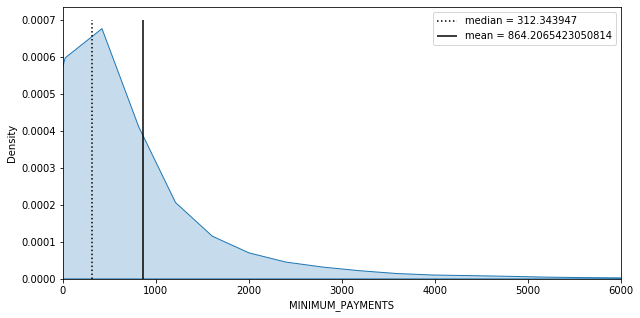

In [7]:
# Visualizing "MINIMUM_PAYMENTS" column to understand its distribution.
plt.figure(figsize=(10,5))
plt.xlim(0,6000)
plt.xlabel('MINIMUM_PAYMENTS')
plt.ylabel('Density')
sns.kdeplot(df['MINIMUM_PAYMENTS'],shade=True)
plt.vlines(df['MINIMUM_PAYMENTS'].median(),0,0.0007, label = "median = {}".format(df['MINIMUM_PAYMENTS'].median()),linestyles = "dotted")
plt.vlines(df['MINIMUM_PAYMENTS'].mean(),0,0.0007, label = "mean = {}".format(df['MINIMUM_PAYMENTS'].mean()))
plt.legend()
plt.show()

In [8]:
# Distribution is right-skewed and median lies at 312.34 and mean lies at 864.20.
print("Percentage of Null values in *MINIMUM_PAYMENTS* columns is {}"
.format(df["MINIMUM_PAYMENTS"].isnull().sum()*100/df.shape[0]),"% .")

Percentage of Null values in *MINIMUM_PAYMENTS* columns is 3.4972067039106145 % .


In [9]:
# null values can be filled using regression. 
# since null values are only 3.5 % and looking at time-constraint, filling NaN values using median.

In [10]:
df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].median(), inplace=True)

In [11]:
df.drop(columns="CUST_ID", inplace=True)

## 2.b  Outlier Treatment using the Z-score method

In [12]:
# Formula for Z-score: Z-score = (x -mean) / std.deviation
#creating function to find outliers:

def z_score(x,i):
    z_score = (x - df[i].mean())/df[i].std()
    if z_score > 3:
        return np.nan
    else:
        return x

In [13]:
for i in df.columns:
    df[i]= df[i].apply(lambda x: z_score(x,i))

In [14]:
df.isnull().sum()   #These are the % of outliers in the data

BALANCE                             196
BALANCE_FREQUENCY                     0
PURCHASES                           135
ONEOFF_PURCHASES                    122
INSTALLMENTS_PURCHASES              137
CASH_ADVANCE                        182
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY              199
CASH_ADVANCE_TRX                    172
PURCHASES_TRX                       185
CREDIT_LIMIT                        152
PAYMENTS                            159
MINIMUM_PAYMENTS                    102
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Since these outliers occupy very small percent of data and, since its a credit card data, there is an extremely small chance that there could be an error recording the data.
for simplicity, we will fill these outliers with median of the data.

In [15]:
for i in df.columns:
    df[i] = df[i].fillna(df[i].median())

## 2 c. Dealing with correlated variables

In [16]:
df_corr = df.corr()

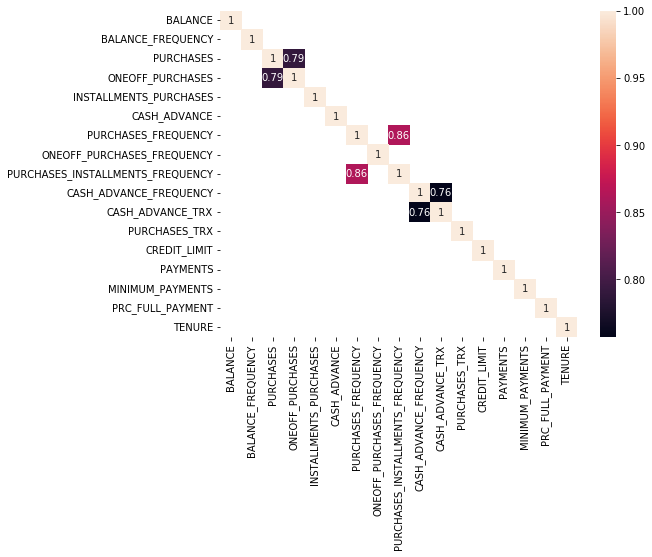

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(df_corr[(df_corr >= 0.70) | (df_corr<= -0.70) ], annot=True)

High correlation between 3 pairs of columns is found.
columns are:
1. one-off purchases and purchases (0.79) --- approx(0.80)
2. purchases frequency and purchases installments frequency (0.86)
3. cash advance frequency and cash advance TRX (0.76)

There are various methods to deal with high correlation, we will stick to the simplest one : Removing any one column out of the pair. we will let 3rd pair be since its quite lesser than 0.8.

In [18]:
df.drop(columns = ["ONEOFF_PURCHASES","PURCHASES_INSTALLMENTS_FREQUENCY"], inplace=True)

# 3] Performing dimensionality reduction using PCA such that the 95% of the variance is explained:

In [19]:
# Standardizing the data first
nz = Normalizer()
df_nor = nz.fit_transform(df)

In [20]:
pca = PCA(n_components=0.95)
pca.fit_transform(df_nor)
pca.explained_variance_ratio_     

array([0.35725702, 0.28402429, 0.16862434, 0.08600037, 0.06420119])

In [21]:
print("components required to explain 95% varience : {}".format(len(pca.explained_variance_ratio_)))

components required to explain 95% varience : 5


# 4] Finding the optimum value of k for k-means clustering using the elbow method. Plotting the elbow curve.

In [22]:
#standardizing the data
sc = StandardScaler()
df_std = sc.fit_transform(df)

In [23]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

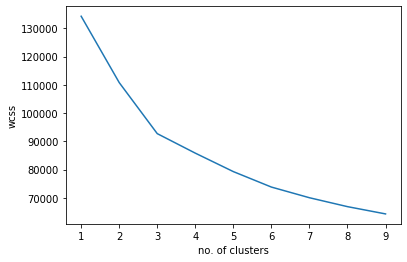

In [24]:
plt.plot(range(1,10),wcss)
plt.xlabel("no. of clusters")
plt.ylabel("wcss")

 Looking at elbow graph, k-value of 3 can be taken for clustering model.

# 5] optimum value of k for k-means clustering using the silhouette score method and the number of observations in each cluster using a bar plot

In [25]:
for i in range(2,7) :
    kmeans = KMeans(n_clusters= i, random_state= 14)
    pred = kmeans.fit_predict(df_std)
    sil_score = silhouette_score(df_std, pred, random_state= 87)
    print("For {} clusters, silhouette score is {}".format(i, sil_score))

For 2 clusters, silhouette score is 0.21143104839309834
For 3 clusters, silhouette score is 0.21508546268827136
For 4 clusters, silhouette score is 0.16238611017811175
For 5 clusters, silhouette score is 0.15652674735800745
For 6 clusters, silhouette score is 0.16733403957511797


# 6] Build a K-means clustering model using the optimum value of K.

In [26]:
#since elbow and silhouette scores are giving k=3 value, we will proceed with 3. 

In [27]:
#taking k=3
kmeans= KMeans(n_clusters= 3, random_state= 78)
kmeans.fit(df)

KMeans(n_clusters=3, random_state=78)

In [28]:
df['Cluster'] = kmeans.fit_predict(df)

In [29]:
df["Cluster"].value_counts()

1    5032
0    2584
2    1334
Name: Cluster, dtype: int64

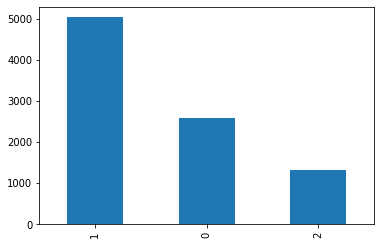

In [30]:
df["Cluster"].value_counts().plot(kind="bar")

# CONCLUSION : 

Firstly, given data "credit card" was loaded and checked for missing values.
There were no missing values in the dataset.

outliers were found out and taken care using median since median is a robust measure than mean.

columns with high correlation found out and dealt.

PCA was implemented and it was found out that 5 features were needed to explain 95% of variance.

In K-means algorithm, elbow-method and silhouette score method was exercised to find out the right value of clusters. It was found out to be 3.